<a href="https://colab.research.google.com/github/fxd-96/1668_app_exp/blob/main/red_neuronal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# [1] Importar librerías
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# [1] Importar librerías
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# [3] Definir la clase RedNeuronal
class RedNeuronal:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate=0.1):
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1


In [4]:
# [4] Crear y entrenar la red
red = RedNeuronal(input_size=2, hidden_size=4, output_size=3)
epochs = 1200
losses = []


for epoch in range(epochs):
    output = red.forward(X)
    loss = -np.mean(np.sum(y_onehot * np.log(output + 1e-8), axis=1))
    losses.append(loss)
    red.backward(X, y_onehot)

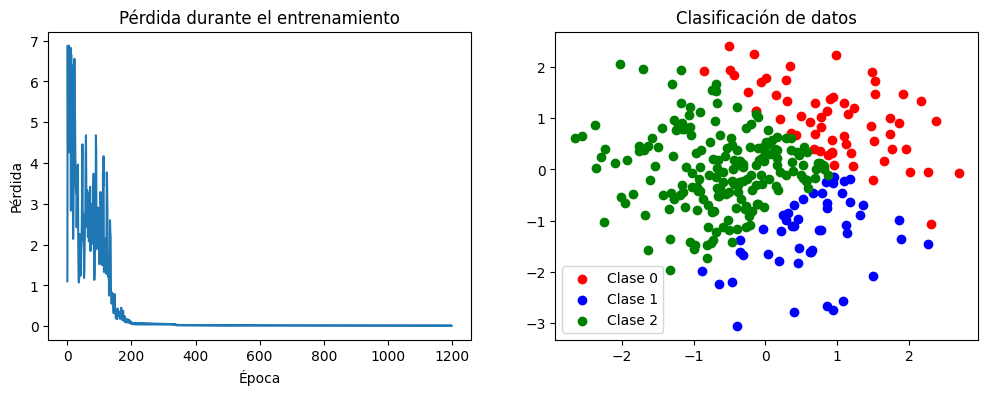

In [5]:
# [5] Visualizar resultados
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(losses)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')

plt.subplot(122)
output = red.forward(X)
predicciones = np.argmax(output, axis=1)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Clase 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], c='green', label='Clase 2')
plt.title('Clasificación de datos')
plt.legend()
plt.show()

In [6]:
# [6] Evaluar precisión
precision = np.mean(predicciones == y)
print(f'Precisión del modelo: {precision * 100:.2f}%')

Precisión del modelo: 99.33%


In [7]:
# [7] Función para probar nuevos puntos
def probar_punto(red, x, y):
    punto = np.array([[x, y]])
    prediccion = red.forward(punto)
    clase = np.argmax(prediccion)
    probabilidades = [f"{p:.4f}" for p in prediccion[0]]
    print(f'Punto ({x}, {y}): Clase {clase} (Probabilidades: {probabilidades})')
    return clase

# Ejemplos de uso
probar_punto(red, 1.5, 1.0)   # Punto cerca de clase 0
probar_punto(red, -1.0, -1.0) # Punto cerca de clase 2
probar_punto(red, 0, -3)  # Punto cerca de clase 1


Punto (1.5, 1.0): Clase 0 (Probabilidades: ['0.9980', '0.0000', '0.0020'])
Punto (-1.0, -1.0): Clase 2 (Probabilidades: ['0.0000', '0.0000', '1.0000'])
Punto (0, -3): Clase 1 (Probabilidades: ['0.0000', '1.0000', '0.0000'])


np.int64(1)

In [8]:
# [8] Función para guardar los pesos de la red
def guardar_pesos(red, archivo):
    np.savez(archivo, W1=red.W1, b1=red.b1, W2=red.W2, b2=red.b2)
    print(f"Pesos guardados en {archivo}.npz")

guardar_pesos(red, "pesos_red_neuronal")

Pesos guardados en pesos_red_neuronal.npz
